<a href="https://colab.research.google.com/github/RudyHarun99/H8_056/blob/master/PYTN_Assgn_1_056_Rudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LONDON CRIME DATA**

##Project Overview

This dataset contains:
- **lsoa_code**: this represents a policing area
- **borough**: the borough for which the statistic is related
- **major_category**: the major crime category
- **minor_category**: the minor crime category
- **value**: the count of the crime for that particular borough, in that particular month
- **year**: the year of the summary statistic
- **month**: the month of the summary statistic

##Data Preparation

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = '/content/gdrive/MyDrive/DATA/Hacktiv8_ptp_python/london_crime_by_lsoa.csv'
df = pd.read_csv(path)
df.shape

(13490604, 7)

In [ ]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [ ]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [ ]:
df.isnull().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

In [ ]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


##Area Chart

Pertanyaan:
- Bagaimana perkembangan crime di 10 borough dengan jumlah crime tertinggi dari tahun 2008 sampai 2016?

Langkah-langkah:
1. Mempersiapkan list yang berisi nama-nama *borough* yang sudah diurutkan berdasarkan jumlah *value* tertinggi hingga terendah
2. Membuat dataframe untuk 10 *borough* dengan jumlah *value* crime tertinggi
3. Menampilkan *Area Chart* untuk melihat perkembangan *value* crime di top 10 borough

In [ ]:
# 1. Mempersiapkan list yang berisi nama-nama borough yang sudah diurutkan berdasarkan jumlah value tertinggi hingga terendah

list_sorted_borough = df.groupby('borough')['value'].sum().sort_values(ascending=False).index
list_sorted_borough

Index(['Westminster', 'Lambeth', 'Southwark', 'Camden', 'Newham', 'Croydon',
       'Ealing', 'Islington', 'Tower Hamlets', 'Brent', 'Hackney', 'Lewisham',
       'Haringey', 'Barnet', 'Hillingdon', 'Wandsworth', 'Waltham Forest',
       'Enfield', 'Hounslow', 'Hammersmith and Fulham', 'Bromley', 'Redbridge',
       'Greenwich', 'Kensington and Chelsea', 'Barking and Dagenham',
       'Havering', 'Harrow', 'Merton', 'Bexley', 'Sutton',
       'Richmond upon Thames', 'Kingston upon Thames', 'City of London'],
      dtype='object', name='borough')

In [ ]:
# 2. membuat dataframe untuk 10 borough dengan jumlah value crime tertinggi

df_top10_borough = pd.DataFrame()
df_list = []

for borough in list_sorted_borough[:10]:
  df_bor = pd.DataFrame(df[df['borough'] == borough].groupby('year')['value'].sum())
  df_bor.rename(columns={'value': borough}, inplace=True)
  df_list.append(df_bor)

df_top10_borough = pd.concat(df_list, axis=1)
df_top10_borough

,Westminster,Lambeth,Southwark,Camden,Newham,Croydon,Ealing,Islington,Tower Hamlets,Brent
year,,,,,,,,,,
2008,47846,31717,33470,32010,29752,29516,28947,26273,23578,23504
2009,48456,31225,30623,31612,28610,29784,28617,25485,21959,24748
2010,48116,31671,31320,31804,30728,29373,31360,24693,23072,25512
2011,54243,33224,30723,33956,27978,29830,29537,24980,24712,27669
2012,59226,33473,30737,31472,30067,30189,28832,26268,26784,26357
2013,53852,31868,31128,28435,27577,27444,25917,23784,26258,23759
2014,47564,31765,28912,27198,28005,27357,24978,24679,25504,24426
2015,47395,33164,30260,29477,29217,28089,26247,27032,27493,24883
2016,48330,34071,31636,29183,30090,28712,27127,27092,29253,26693


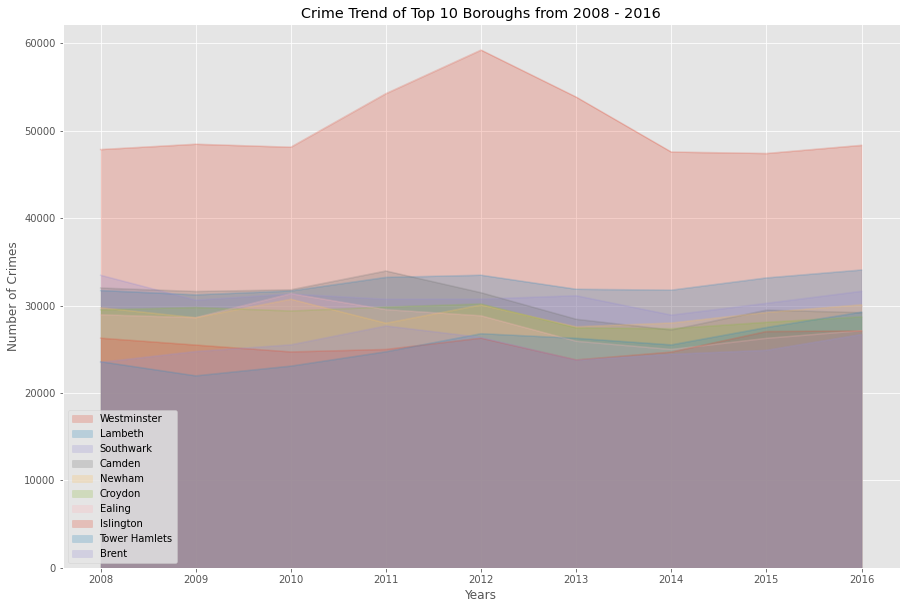

In [ ]:
# 3. menampilkan area chart
mpl.style.use(['ggplot'])

df_top10_borough.index = df_top10_borough.index.map(int)

df_top10_borough.plot(kind='area', alpha=0.25, stacked=False, figsize=(15, 10))

plt.title('Crime Trend of Top 10 Boroughs from 2008 - 2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')

plt.show()

Kesimpulan:

Dilihat dari grafik di atas, dari 10 borough tertinggi, value di borough Westminster jauh lebih tinggi dari rata-rata borough lain. Antara tahun 2010 hingga 2014 terjadi lonjakan value crime pada borough Westminster, dengan puncaknya tercatat pada tahun 2012, sementara pada borough lain cenderung datar.

##Histogram Chart

Pertanyaan:
- Bagaimana persebaran *value* crime di 10 *borough* tertinggi dari tahun 2008 hingga 2016?

Lanngkah-langkah:
1. Membagi bin ke dalam satuan tertentu
2. Menampilkan *Histogram Chart* untuk melihat persebaran *value* crime di 10 *borough* tertinggi

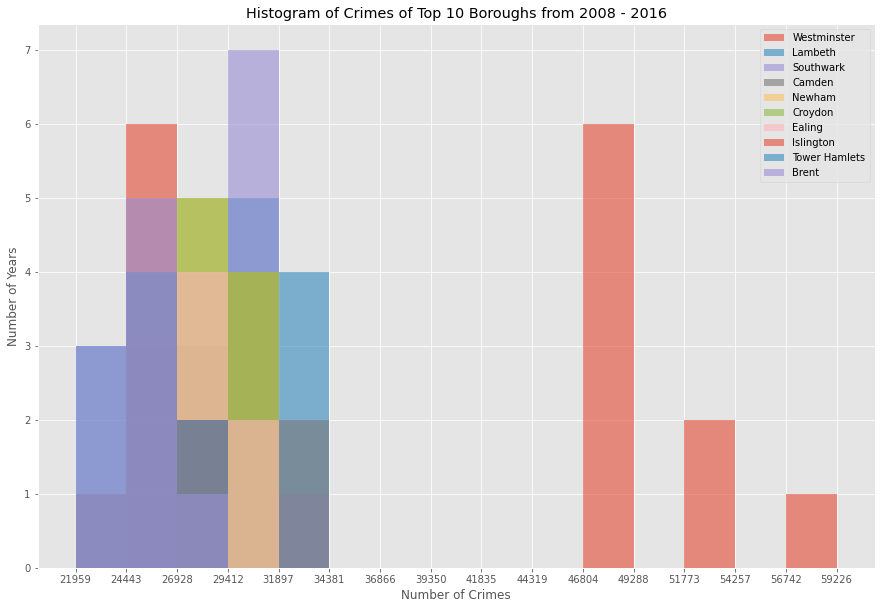

In [ ]:
# 1. Membagi bin ke dalam satuan tertentu
count, bin_edges = np.histogram(df_top10_borough, 15)

# 2. Menampilkan Histogram Chart
df_top10_borough.plot(kind='hist',
          figsize=(15, 10),
          bins=15,
          alpha=0.6,
          xticks=bin_edges)

plt.title('Histogram of Crimes of Top 10 Boroughs from 2008 - 2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Crimes')

plt.show()

Kesimpulan:

Dari *histogram* di atas, terlihat persebaran *value* di borough Westminster memang jauh di atas persebaran borough lain.

##Bar Chart

Pertanyaan:
- Bagaimana perkembangan jumlah seluruh crime dari tahun 2008 hingga 2016?

Langkah-langkah:
1. Membuat dataframe yang menampung *value* pertahun
2. Menampilkan *Bar Chart* untuk melihat perkembangan jumlah seluruh crime dari tahun 2008 hingga 2016

In [ ]:
# 1. Membuat dataframe yang menampung value pertahun

df_year = pd.DataFrame(df.groupby('year')['value'].sum())
df_year

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


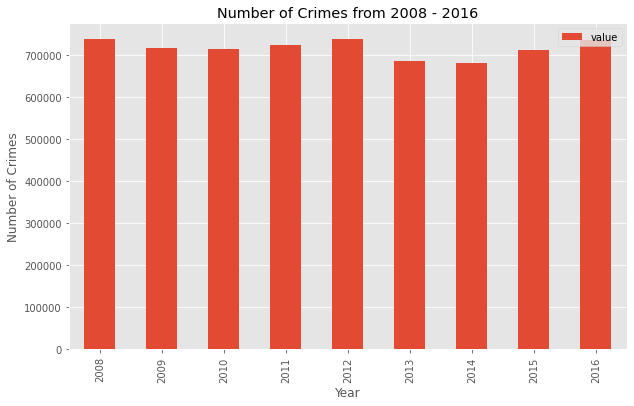

In [ ]:
# 2. Menampilkan Bar Chart untuk melihat perkembangan jumlah seluruh crime dari tahun 2008 hingga 2016

df_year.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes from 2008 - 2016')

plt.show()

Kesimpulan:

Perkembangan jumlah keseluruhan crime tahunan dari tahun 2008 sampai tahun 2016 cenderung *flat*. Belum terjadi penurunan yang signifikan terhadap jumlah crime yang terjadi.

##Pie Chart

Pertanyaan:
- Bagaimana persentase jumlah crime keseluruhan berdasarkan *major category*

Langkah-langkah:
1. Membuat dataframe yang menampung *value* berdasarkan *major_category*
2. Menampilkan *Pie Chart* untuk melihat pembagian crime secara persentase berdasarkan *major_category*

In [ ]:
# 1. Membuat dataframe yang menampung value berdasarkan major_category

df_category = pd.DataFrame(df.groupby('major_category')['value'].sum())
df_category

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


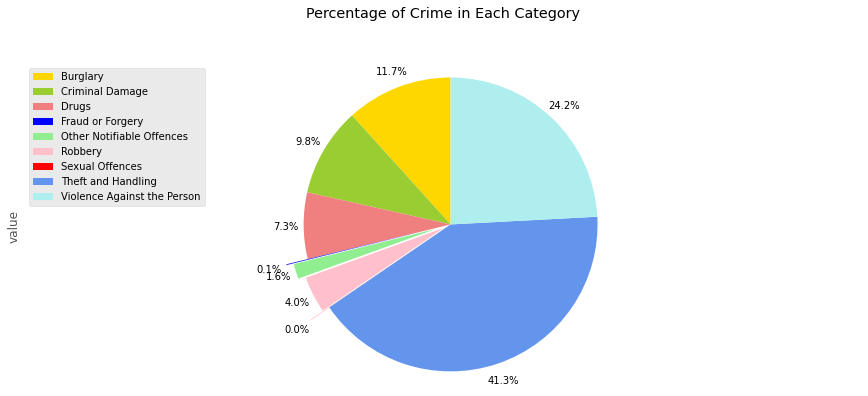

In [ ]:
# 2. Menampilkan Pie Chart untuk melihat pembagian crime secara persentase berdasarkan major_category

color_list = ['gold', 'yellowgreen', 'lightcoral', 'blue', 'lightgreen', 'pink', 'red','cornflowerblue','paleturquoise']
explode_list = [0, 0, 0, 0.15, 0.1, 0.05, 0.15, 0, 0]

df_category['value'].plot(kind='pie', figsize=(15, 6), autopct='%1.1f%%', startangle=90, labels=None, pctdistance=1.12, colors=color_list, explode=explode_list)

plt.title('Percentage of Crime in Each Category', y=1.12)
plt.axis('equal')

plt.legend(labels=df_category.index, loc='upper left')

plt.show()

Kesimpulan:

Secara persentase, ada 5 besar crime yang sering terjadi yaitu:
1. Theft and Handling = 41.3%
2. Violence Against the Person = 24.2%
3. Burglary = 11.7%
4. Criminal Damage = 9.8%
5. Drugs = 7.3%

##Box Chart

Pertanyaan:
- Bagaimana nilai nilai *minimum, maksimum, dan outlier* dari jumlah *value* crime di top 10 *borough* dari tahun 2008 hingga 2016?

Langkah-langkah:
- Dengan menggunakan dataframe *df_top10_borough*, tampilkan *Box Chart* dari jumlah *value* crime dari tahun 2008 hingga 2016

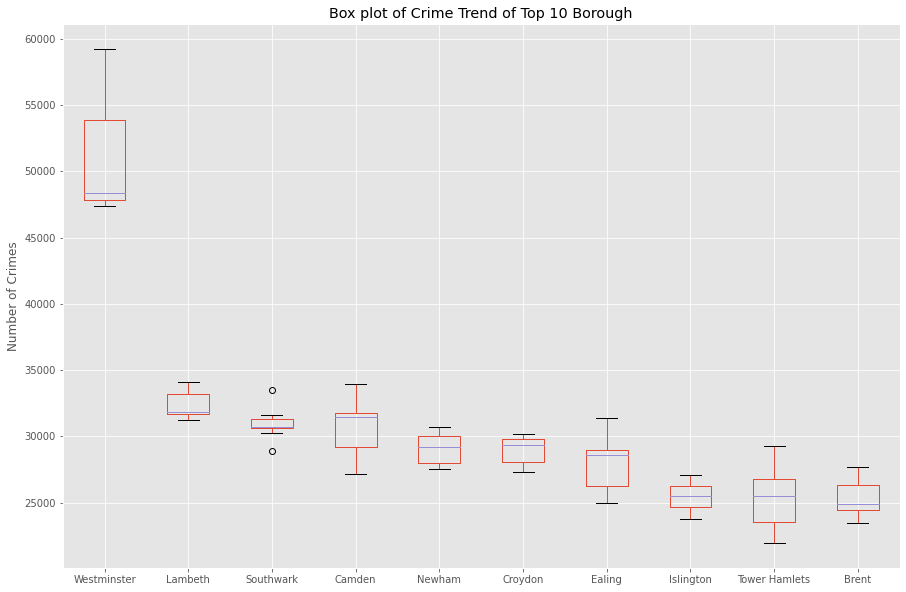

In [ ]:
# Dengan menggunakan dataframe df_top10_borough, tampilkan Box Chart dari jumlah value crime dari tahun 2008 hingga 2016

df_top10_borough.plot(kind='box', figsize=(15, 10))

plt.title('Box plot of Crime Trend of Top 10 Borough')
plt.ylabel('Number of Crimes')

plt.show()

Kesimpulan:

Terlihat bahwa beberapa borough memiliki nilai minimum dan maksimum yang cukup jauh, dengan borough Westminster yang memiliki jarak paling jauh. Namun borough Southwark memiliki jarak minimum dan maksimum paling sempit, dan memiliki outlier dibandingkan borough lain.

##Scatter Chart

Pertanyaan:
- Bagaimana persebaran nilai *value* pertahun dari tahun 2008 hingga 2016?

Langkah-langkah:
1. Reset index *df_year*, lalu rename columns
2. Tampilkan *Scatter Chart* untuk melihat persebaran nilai *value* pertahun dari tahun 2008 sampai 2016

In [ ]:
# 1. Reset index df_year
df_year.reset_index(inplace=True)

# Rename columns
df_year.columns = ['year', 'total']
df_year

,year,total
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


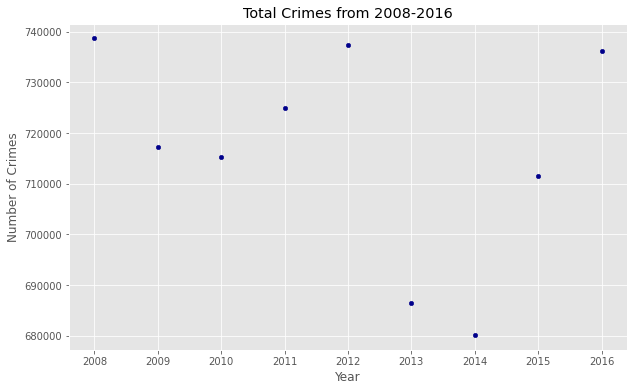

In [ ]:
# 2. Tampilkan Scatter Chart untuk melihat persebaran nilai value pertahun dari tahun 2008 sampai 2016

df_year.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Crimes from 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

plt.show()

Kesimpulan:

Dari persebaran jumlah *value* per tahun, terlihat bawah pada tahun 2013 dan 2014 terjadi penurunan jumlah *value* crime, namun setelah itu melonjak kembali.

##Word Cloud

Pertanyaan:
- Kata apa yang paling sering muncul dari *minor category* crime?

Langkah-langkah:
1. Import wordcloud
2. Bentuk string yang menampung kata-kata dari *minor_category*
3. Tampilkan *Wordcloud*
4. Bandingkan dengan *minor_category unique()*

In [ ]:
# 1. Import wordcloud

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [ ]:
# 2. Bentuk string yang menampung kata-kata dari minor_category

word_string = ''

for minor in df['minor_category']:
  word_string += ' ' + minor + ' '

wordcloud = WordCloud(background_color='white').generate(word_string)

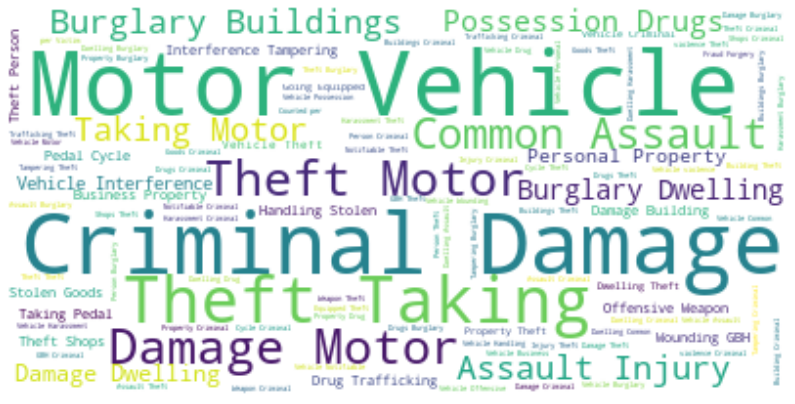

In [ ]:
# 3. Tampilkan Wordcloud

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# 4. Bandingkan dengan minor_category unique()

for minor in df['minor_category'].unique():
  print(minor)

Burglary in Other Buildings
Other violence
Personal Property
Other Theft
Offensive Weapon
Criminal Damage To Other Building
Theft/Taking of Pedal Cycle
Motor Vehicle Interference & Tampering
Theft/Taking Of Motor Vehicle
Wounding/GBH
Other Theft Person
Common Assault
Theft From Shops
Possession Of Drugs
Harassment
Handling Stolen Goods
Criminal Damage To Dwelling
Burglary in a Dwelling
Criminal Damage To Motor Vehicle
Other Criminal Damage
Counted per Victim
Going Equipped
Other Fraud & Forgery
Assault with Injury
Drug Trafficking
Other Drugs
Business Property
Other Notifiable
Other Sexual
Theft From Motor Vehicle
Rape
Murder


Kesimpulan:

Dari *wordcloud* terlihat ada beberapa kata yang lebih besar, yaitu:
- Criminal
- Damage
- Motor
- Vehicle

Bila kita bandingkan dengan *minor_category unique*, ada satu category yang cocok dengan kata-kata yang besar tersebut, yaitu **Criminal Damage to Motor Vehicle**

##Folium

In [ ]:
import folium

In [ ]:
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=12)
london_map

In [ ]:
df_borough = pd.DataFrame(df.groupby('borough')['value'].sum())
df_borough.reset_index(inplace=True)
df_borough

,borough,value
0,Barking and Dagenham,149447
1,Barnet,212191
2,Bexley,114136
3,Brent,227551
4,Bromley,184349
5,Camden,275147
6,City of London,780
7,Croydon,260294
8,Ealing,251562
9,Enfield,193880


In [ ]:
df_top10_borough_T = df_top10_borough.transpose()
df_top10_borough_T['sum'] = df_top10_borough_T.sum(axis=1)
df_top10_borough_T.drop([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], axis=1, inplace=True)
df_top10_borough_T['x'] = [-0.1352, -0.1333, -0.06915, -0.1405, 0.0333, -0.1005, -0.3333, -0.1058, -0.0500, -0.2710]
df_top10_borough_T['y'] = [51.4947, 51.4167, 51.4654, 51.5363, 51.5167, 51.3764, 51.5000, 51.5465, 51.5167, 51.5597]
df_top10_borough_T.reset_index(inplace=True)
df_top10_borough_T.rename(columns={'index': 'borough', 'sum': 'total'}, inplace=True)
df_top10_borough_T

year,borough,total,x,y
0,Westminster,455028,-0.13520,51.4947
1,Lambeth,292178,-0.13330,51.4167
2,Southwark,278809,-0.06915,51.4654
3,Camden,275147,-0.14050,51.5363
4,Newham,262024,0.03330,51.5167
5,Croydon,260294,-0.10050,51.3764
6,Ealing,251562,-0.33330,51.5000
7,Islington,230286,-0.10580,51.5465
8,Tower Hamlets,228613,-0.05000,51.5167
9,Brent,227551,-0.27100,51.5597


In [ ]:
crimes = folium.map.FeatureGroup()

for lat, lng, in zip(df_top10_borough_T.y, df_top10_borough_T.x):
  crimes.add_child(
      folium.CircleMarker(
          [lat, lng],
          radius=5,
          color='yellow',
          fill=True,
          fill_color='blue',
          fill_opacity=0.6
      )
  )

latitudes = list(df_top10_borough_T.y)
longitudes = list(df_top10_borough_T.x)
labels = list(df_top10_borough_T.borough)

for lat, lng, label in zip(latitudes, longitudes, labels):
  folium.Marker([lat, lng], popup=label).add_to(london_map)

london_map.add_child(crimes)